# **REGRESIÓN LINEAL MÚLTIPLE**

Un modelo de regresión donde interviene más de una variable regresora se llama **modelo de regresión múltiple**


Para trabajar en estos conceptos, utlizaremos el dataset [Resistencia del Hormigon](https://www.kaggle.com/datasets/maajdl/yeh-concret-data/) que utlizaremos para nuestro modelo.

![image.png](attachment:image.png)

**Acerca del conjunto de datos**

**Contexto**

**Resumen**
El hormigon es el material más importante en la ingenieria civil.

La resistencia a la compresión es una función alatamente no lineal de la edad y los ingredientes.

**Contenido**

**Conjunto de datos de resistencia a la compresión del hormigon**

**Información del conjunto de datos:**

Número de instancias: 1030
Número de atributos: 9
Valores de atributos faltantes: Ninguno

**Información de atributos**
Se proporcionan el nombre de la variable, el tipo de variable, la unidad de medida y una breve descripción. La resistencia a la compresión del hormigón es el problema de regresión. El orden de este listado corresponde al orden de los números a lo largo de las filas de la base de datos.

*Nombre - Tipo de datos - Medición*

* Cemento  -- cuantitativo -- kg en una mezcla de m3 
* Escoria de alto horno  -- cuantitativa -- kg en una mezcla de m3 
* Cenizas volantes  -- cuantitativa - - kg en m3 de mezcla 
* Agua -- cuantitativo - kg en m3 de mezcla 
* Superplastificante  - cuantitativa - kg en m3 de mezcla 
* Agregado Grueso -- cuantitativo -- kg en una mezcla de m3 
* Agregado fino -- cuantitativo -- kg en una mezcla de m3 
* Edad -- cuantitativa -- Día (1~365) 
* Resistencia a la compresión del hormigón -- cuantitativa -- MPa 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## **1.1 Modelo de regresión múltiple**

Un modelo de regresión múltiple que podría describir esta relación es

$$y = \beta_0 + \beta_1{x_1} + \beta_2{x_2} + \varepsilon \tag{1.1}$$

Este es un **modelo de regresión múltiple** con dos variables regresoras. Se usa el término **lineal** porque la ecuación $(1.1)$ es una función lineal de los parámetros desconocidos $\beta_0 , \beta_1$ y $\beta_2$.

El parámetro $\beta_1$ indica el cambio esperado de la respuesta $y$ por cambio unitario en $x_1$, cuando $x_2$ se mantiene constante. De igual modo, $\beta_2$ mide el cambio esperado de $y$ por unidad de cambio de $x_2$ cuando se mantiene constante $x_1$.

En general, se puede relacionar la **respuesta** $y$ con $k$ **regresoras**, o **variables predictoras**. El modelo

$$y = \beta_0 + \beta_1{x_1} + \beta_2{x_2} + ... + \beta_k{x_k} + \varepsilon \tag{1.2}$$

se llama **modelo de regresión lineal múltiple** con $k$ regresoras. Los parametros $\beta_j , j = 0,1,..,k$ se llaman **coeficientes de regresión**.





In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llanosrenzo/MachineLearning/main/Regresion/Concrete_Data_Yeh.csv',sep = ';', )
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


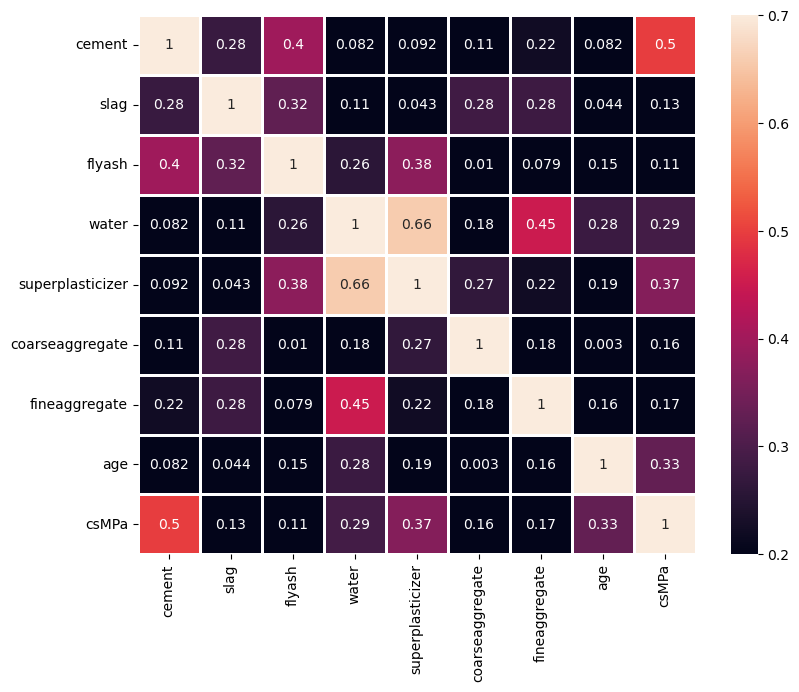

In [5]:
plt.figure(figsize = (9,7))
sns.heatmap(df.corr().abs(),annot=True,linewidths=2,
            vmin = 0.2,vmax = 0.7)
plt.show()

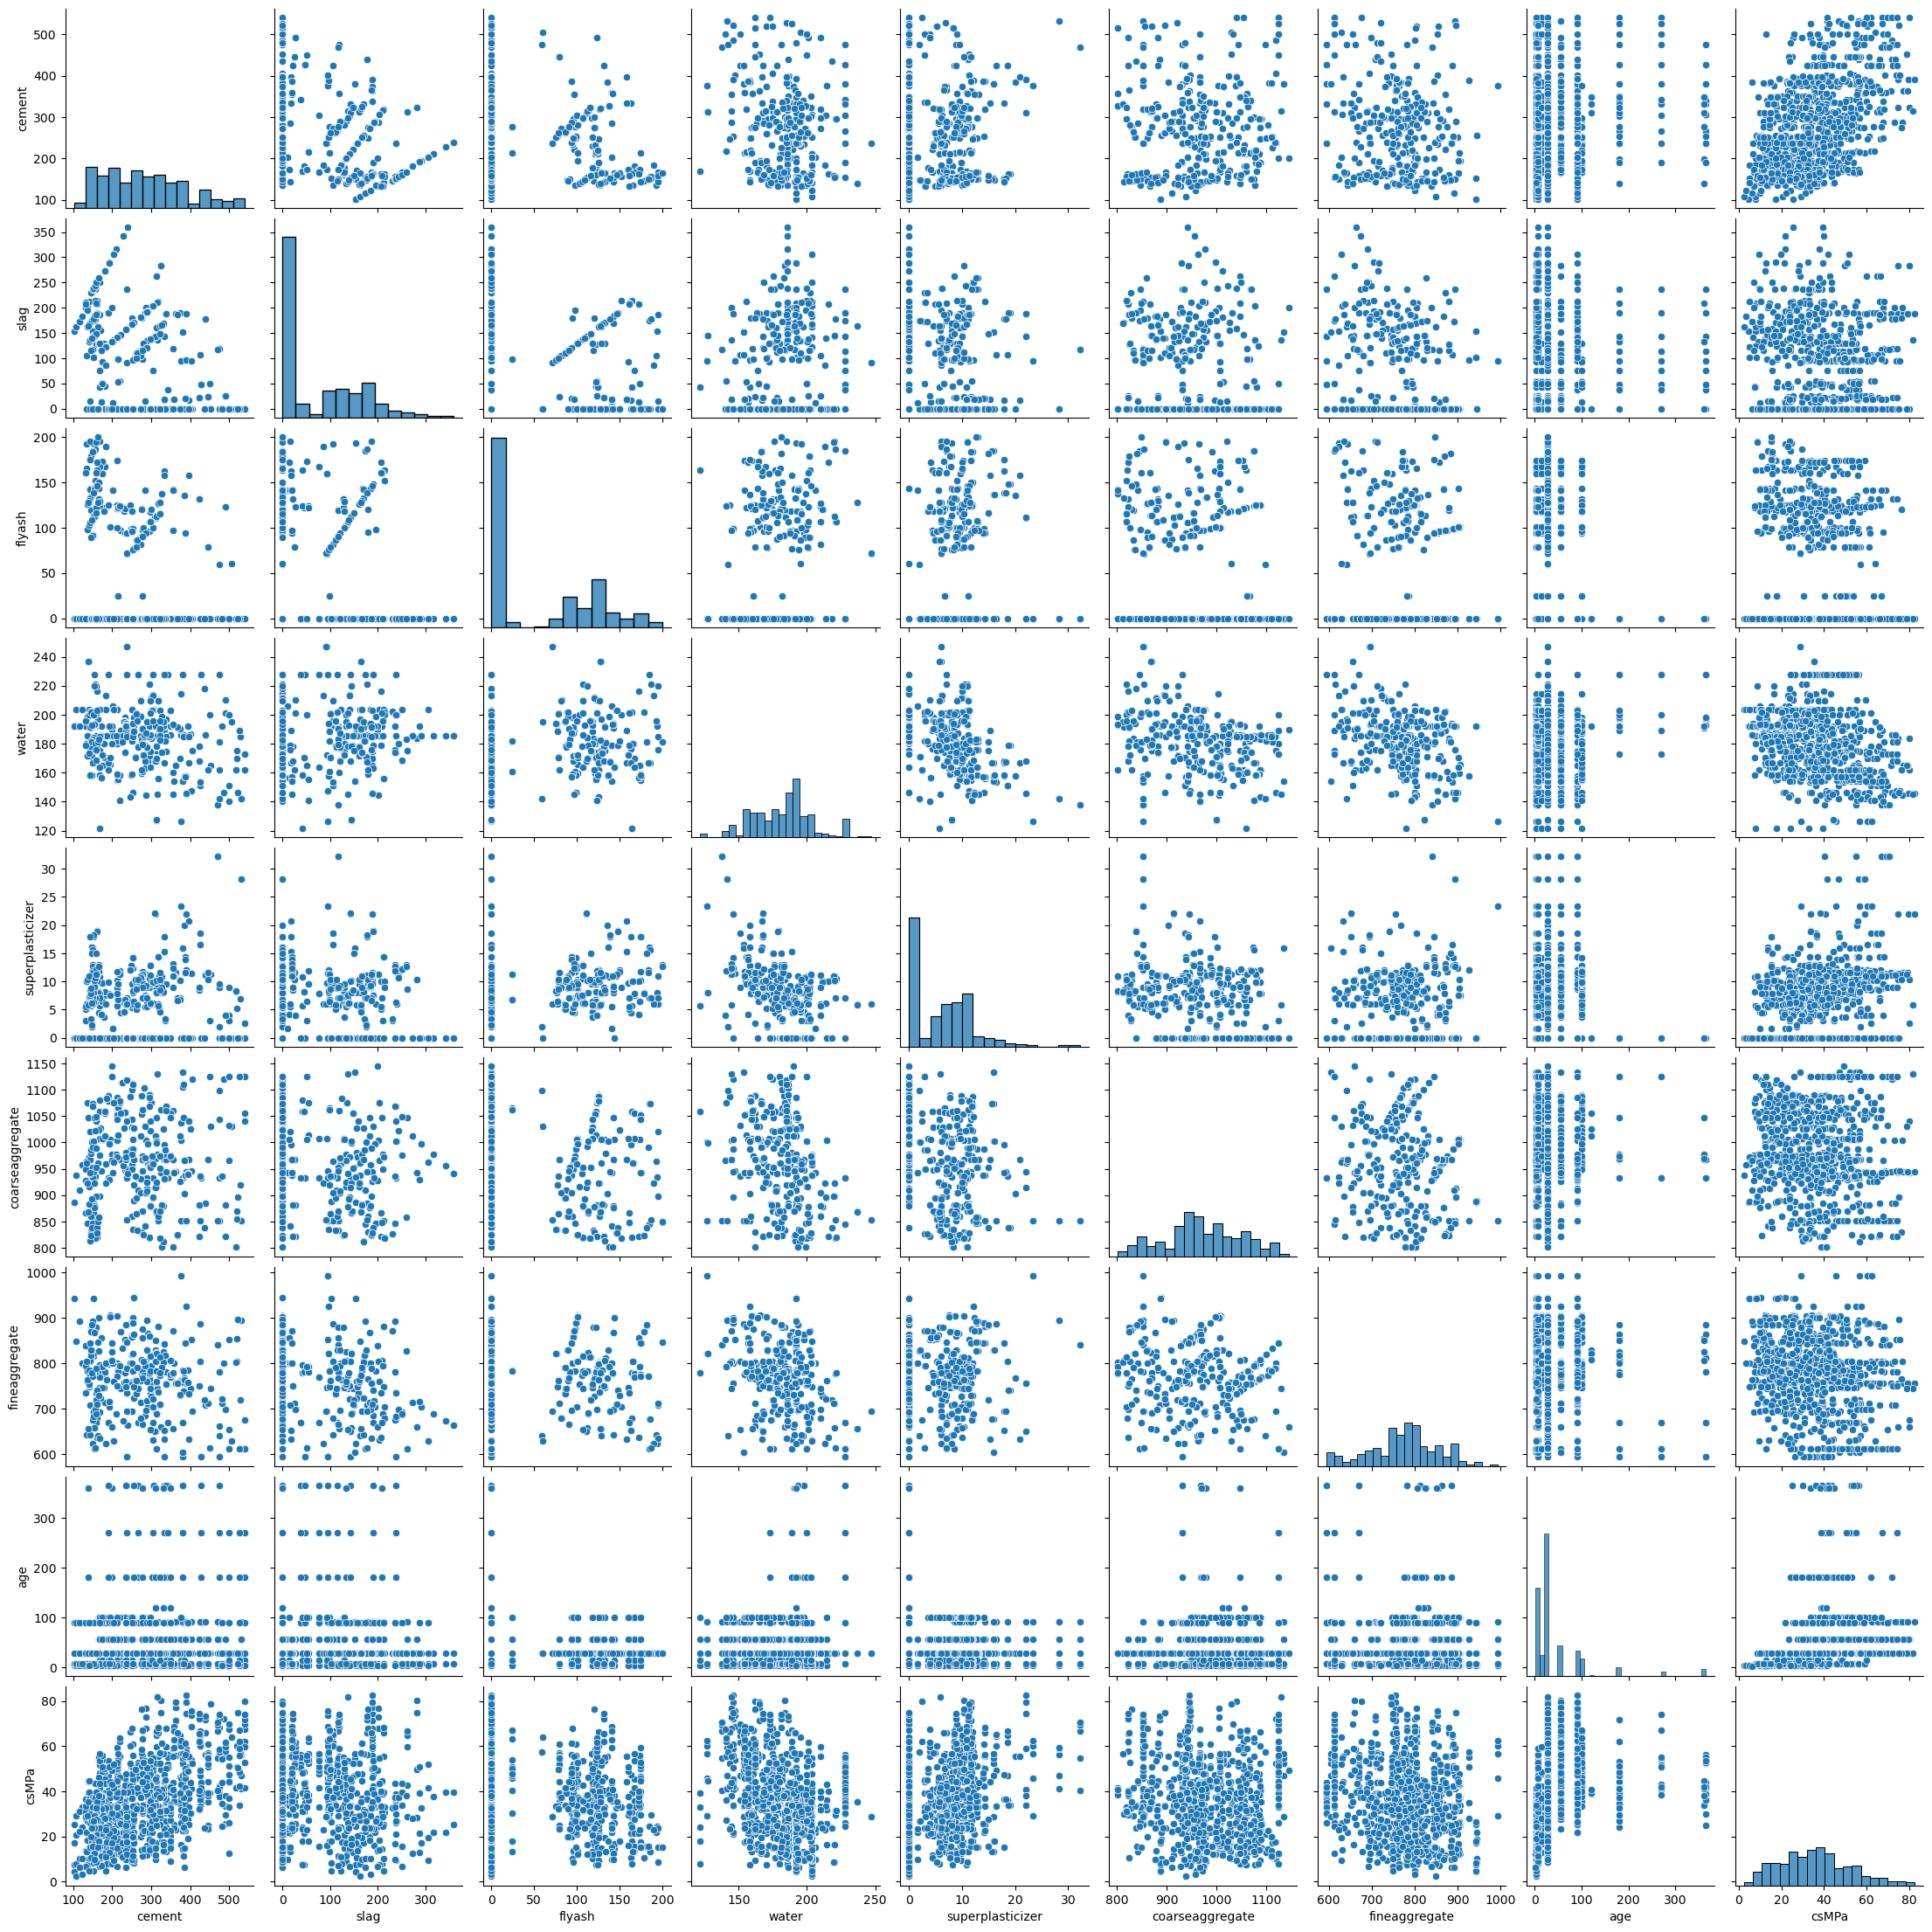

In [6]:
sns.pairplot(df)

* **Diagrama de dispersion entre la variable mayor correlacionada**

Los aditivos plastificantes y superplastificantes de hormigón, son aditivos para hormigón capaces de mejorar las propiedades del hormigón. Se emplean para conferir al hormigón fresco un mejor comportamiento en cuanto a trabajabilidad y bombeabilidad, pero también se busca con su uso mejorar significativamente la resistencia y la durabilidad del hormigón final.

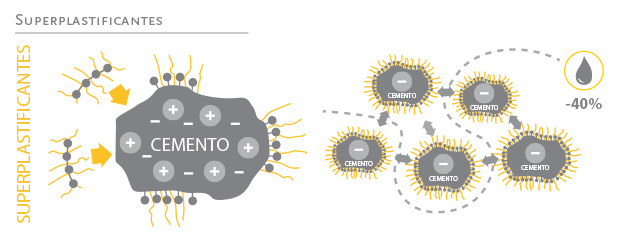

In [7]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

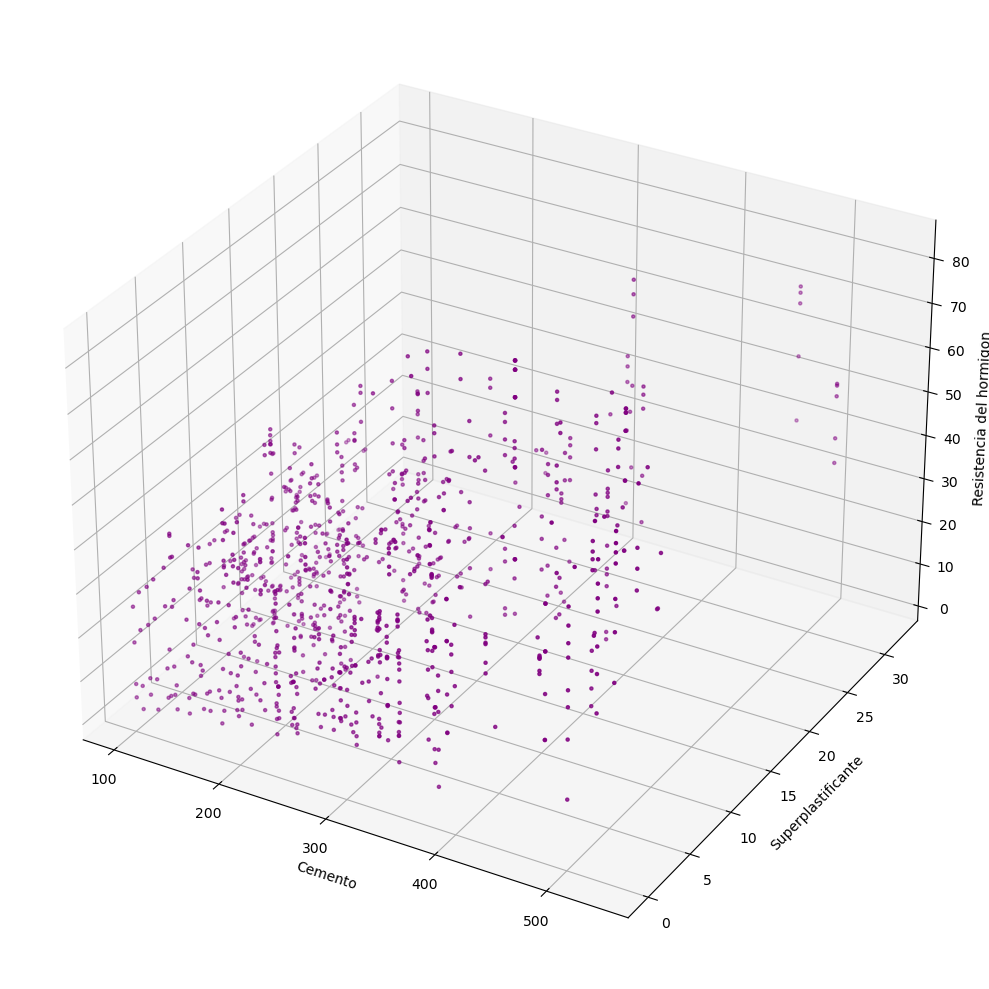

In [28]:

fig = plt.figure(figsize=(10, 18))
ax = fig.add_subplot(111, projection='3d')

x1 = df['cement']
x2 = df['superplasticizer']
y = df['csMPa']

ax.scatter(x1, x2, y,marker='.',c = 'purple')
ax.set_xlabel('Cemento')
ax.set_ylabel('Superplastificante')
ax.set_zlabel('Resistencia del hormigon')
# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [9]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [10]:
X = df.drop(labels= 'csMPa',axis = 'columns')
y = df['csMPa']
display(X.head(3))

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270


In [11]:
X_train, X_test ,y_train ,y_test = train_test_split(X,y.values.reshape(-1,1),
                                                    train_size=0.8,
                                                    random_state=123,
                                                    shuffle=True)

In [30]:
X_train = sm.add_constant(X_train,prepend=True)
modelo = sm.OLS(endog=y_train,exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     161.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.43e-162
Time:                        12:10:20   Log-Likelihood:                -3098.7
No. Observations:                 824   AIC:                             6215.
Df Residuals:                     815   BIC:                             6258.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.8090     30.003  

In [31]:
X_train.drop(labels = 'fineaggregate',axis = 'columns',inplace = True)
X_test.drop(labels = 'fineaggregate',axis = 'columns',inplace = True)

In [32]:
modelo = sm.OLS(endog = y_train,exog = X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     183.7
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          6.35e-163
Time:                        12:19:01   Log-Likelihood:                -3100.5
No. Observations:                 824   AIC:                             6217.
Df Residuals:                     816   BIC:                             6255.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               19.4938     10.064  

## **1.2 Estimación de los modelos del parámetro**

### **1.2.1 Estimación de los coeficientes de regresión por mínimos cuadrados**

Se puede aplicar el **método de mínimos cuadrados** para estimar los coeficientes de regresión de la ecuación $(1.2)$.Supongamos que se dispone $n>k$ observaciones, y sea $y_i$ la $i-ésima$ respuesta observada, y $x_{ij}$ la $i-ésima$ observación o nivel del regresor $x_j$.Se supone que el término de error $\varepsilon$ del modelo tiene $E(\varepsilon)=0 , Var(\varepsilon) = \sigma^2$ y que los errores no están correlacionados.

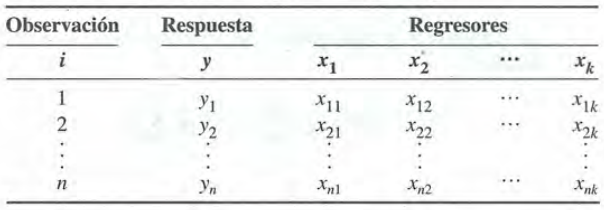

Se supondrá que las variables regresoras $x_1, x_2,... ,x_k$ , son fijas, es decir, que son matemáticas o no aleatorias, y que se miden sin error.Cuando se prueban hipótesis o se establecen intervalos de confianza, se deben suponer que la distribución condicional de $y$ dadas $x_1, x_2, ...., x_k$ es normal, con promedio $\beta_0 + \beta_1{x_1} + \beta_2{x_2} + \cdots +\beta_k{x_k}$ y varianza $\sigma^2$.

Se puede escribir en la siguiente forma el modelo muestral de regresión que corresponde a la ecuación $(1.2)$:

$$y_i = \beta_0 + \beta_1{x_{i1}} + \beta_2{x_{i2}} + \cdots + \beta_k{x_{ik}} + \varepsilon_i$$

$$= \beta_0 + \sum_{j=1}^k{\beta_j {x_{ij}}} + \varepsilon_i , i = 1,2, \cdots , n \tag{1.8}$$

La función de mínimos cuadrados es 

$$S(\beta_0, \beta_1, \cdots , \beta_k) = \sum_{i=1}^n {\varepsilon_i^2}$$

$$= \sum_{i=1}^n \bigg( y_i - \beta_0 - \sum_{j=1}^{k} {\beta_j {x_{ij}}}\bigg)^2 \tag{1.9}$$

Se debe minimizar la función $S$ respecto a $\beta_0, \beta_1, \cdots , \beta_k$. Los estimadores de $\beta_0, \beta_1, \cdots , \beta_k$ por mínimos cuadrados deben satisfacer

$$\frac{\partial S}{\partial \beta_0} \bigg|_{\hat{\beta}_0, \hat{\beta}_1 , ... , \hat{\beta}_k} = -2\sum_{i=1}^{n} \bigg( y_i - \hat{\beta}_0	- \sum_{j=1}^k {\hat{\beta}_j {x_{ij}}} \bigg)= 0 \tag{1
10a}$$

y

$$\frac{\partial S}{\partial \beta_0} \bigg|_{\hat{\beta}_0, \hat{\beta}_1 , ... , \hat{\beta}_k} = -2\sum_{i=1}^n \bigg( y_i - \hat{\beta}_0 - \sum_{j=1}^k {\hat{\beta}_j {x_{ij}}}\bigg) x_{ij} = 0, j = 1,2,...,k \tag{1.10b}$$

Al simplificar la ecuación $(3.10)$ se obtienen las **ecuaciones normales de mínimos cuadrados**

$$n\hat{\beta}_0 + \hat{\beta}_1\sum_{i=1}^n {x_{i1}} + \hat{\beta}_2\sum_{i=1}^n {x_{i2}} + \cdots + \hat{\beta}_k\sum_{i=1}^n {x_{ik}} = \sum_{i=1}^{n} y_i$$

$$\hat{\beta}_0 \sum_{i=1}^{n}{x_{i1}} + \hat{\beta}_1 \sum_{i=1}^{n}{x_{i1}^2} + \hat{\beta}_2 \sum_{i=1}^{n}{{x_{i1}}{x_{i2}}} + \cdots + \hat{\beta}_k \sum_{i=1}^n{x_{i1}}{x_{ik}} = \sum_{i=1}^n{{x_{i1}}{y_i}}$$

$$\vdots  \vdots   \vdots   \ddots  \vdots  \vdots$$

$$\hat{\beta}_0 \sum_{i=1}^{n} x_{ik} + \hat{\beta}_1 \sum_{i=1}^n {x_{ik} x_{i1}} + \hat{\beta}_2 \sum_{i=1}^n{x_{ik} x_{i2}}+ \cdots + \hat{\beta}_k \sum_{i=1}^n {x_{ik}^2} = \sum_{i=1}^n {x_{ik} y_i}  \tag{1.11}$$

Nótese que hay $p=k+1$ ecuaciones normales, una para cada uno de los coeficientes desconocidos de regresión. La solución de las ecuaciones normales serán los **estimadores por mínimos cuadrados** $\hat{\beta}_0, \hat{\beta}_1, ..., \hat{\beta}_k$.

Es más comodo manejar modelos de regresión múltiple cuando se expresan en notación matricial. Eso permite presentar en forma muy compacta al modelo, los datos y los resultados. En notación matricial el modelo expresado por la ecuación $(1.8)$ es

$$y = X\beta + \varepsilon$$

en donde
$$
 y =
\begin{bmatrix}
y_1 \\
y_2\\
\vdots \\
y_n
\end{bmatrix}
\ , X= \begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1k} \\
1 & x_{21} & x_{22} & \cdots & x_{2k} \\
\vdots & \vdots &\vdots & & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{nk} 
\end{bmatrix}$$

$$\beta =
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_k
\end{bmatrix},
\varepsilon = 
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{bmatrix}$$

## **1.3 Prueba de hipótesis en regresión lineal multiple**